In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("clientes_90min.csv")

In [18]:
df_original = pd.read_csv("clientes_90min.csv")
df_original.drop(columns=['Unnamed: 0','COORDS'],inplace=True)


In [19]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLIENTE                 37 non-null     int64  
 1   LOCALIDAD               37 non-null     object 
 2    PROVINCIA              37 non-null     object 
 3   lat                     37 non-null     float64
 4   lon                     37 non-null     float64
 5   tiempo_desde_sede_min   37 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.9+ KB


In [3]:
df.columns

Index(['Unnamed: 0', 'CLIENTE', 'LOCALIDAD', ' PROVINCIA ', 'COORDS', 'lat',
       'lon', 'tiempo_desde_sede_min '],
      dtype='object')

In [4]:
df.drop(columns=['Unnamed: 0','COORDS'],inplace=True)

In [9]:
df= df.drop_duplicates('LOCALIDAD')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 0 to 36
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLIENTE                 26 non-null     int64  
 1   LOCALIDAD               26 non-null     object 
 2    PROVINCIA              26 non-null     object 
 3   lat                     26 non-null     float64
 4   lon                     26 non-null     float64
 5   tiempo_desde_sede_min   26 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.4+ KB


In [11]:
df

,CLIENTE,LOCALIDAD,PROVINCIA,lat,lon,tiempo_desde_sede_min
0,1,HARO,LA RIOJA,42.568106,-2.858153,2.664373
1,3,STO. DOMINGO,LA RIOJA,42.433120,-2.950750,17.536715
2,4,DURANA,ALAVA,42.887026,-2.639514,50.280536
4,6,VITORIA,ALAVA,42.837400,-2.670095,43.027608
5,7,URDIAIN,NAVARRA,42.889615,-2.138824,85.098682
6,9,LOGROÑO,LA RIOJA,42.450132,-2.447887,44.074226
7,10,SAN VICENTE,LA RIOJA,42.557231,-2.756225,11.553523
8,11,ALSASUA,NAVARRA,42.892317,-2.160412,83.500674
10,18,NANCLARES,ALAVA,42.815165,-2.816816,35.582374
11,19,SALINAS,ALAVA,42.802543,-2.988256,35.326752


    CLIENTE     LOCALIDAD  cluster_label
0         1          HARO              2
1         3  STO. DOMINGO              2
2         4        DURANA              0
4         6       VITORIA              0
5         7       URDIAIN              3
6         9       LOGROÑO              1
7        10   SAN VICENTE              2
8        11       ALSASUA              3
10       18     NANCLARES              0
11       19       SALINAS              0
12       20       MIRANDA              0
13       21         SOTES              2
14       22         NALDA              1
16       24      PRADEJÓN              3
17       25    EL RASILLO              2
18       26         NIEVA              2
19       28      CENICERO              2
20       29     LAGUARDIA              1
22       31     AGONCILLO              1
26       36       BRIONES              2
27       37        NAJERA              2
31       44         SESMA              3
32       45         LERÍN              3
33       46     

C:\Users\danie\AppData\Local\Temp\ipykernel_19752\3845797724.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster_label"] = kmeans.fit_predict(X)


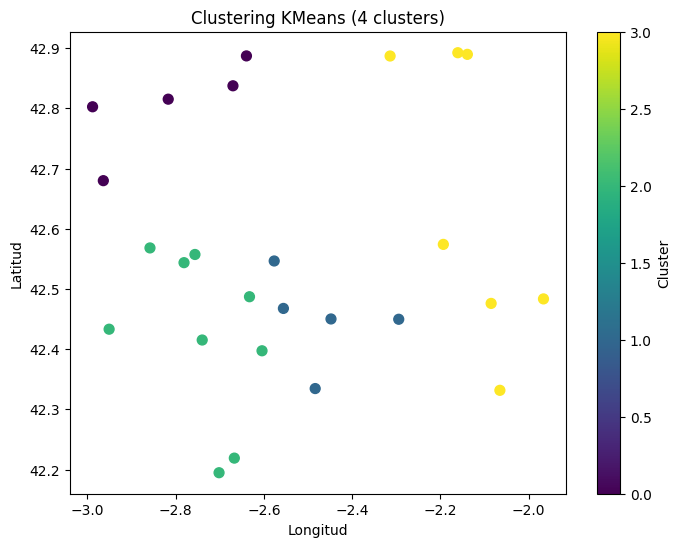

In [12]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Cargar tus datos (si ya tienes el DataFrame, puedes omitir esta línea)
# df = pd.read_csv("ruta_a_tu_archivo.csv")

# Seleccionamos solo las columnas numéricas relevantes para el clustering
X = df[["lat", "lon"
        ]]

# Crear y entrenar el modelo KMeans con 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df["cluster_label"] = kmeans.fit_predict(X)

# Mostrar el DataFrame con los clusters
print(df[["CLIENTE", "LOCALIDAD", "cluster_label"]])

# Opcional: Visualización 2D (lat vs lon, coloreado por cluster)
plt.figure(figsize=(8,6))
plt.scatter(df["lon"], df["lat"], c=df["cluster_label"], cmap="viridis", s=50)
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Clustering KMeans (4 clusters)")
plt.colorbar(label="Cluster")
plt.show()


    CLIENTE     LOCALIDAD  cluster_label
0         1          HARO              0
1         3  STO. DOMINGO              0
2         4        DURANA              2
4         6       VITORIA              0
5         7       URDIAIN              2
6         9       LOGROÑO              1
7        10   SAN VICENTE              0
8        11       ALSASUA              2
10       18     NANCLARES              0
11       19       SALINAS              0
12       20       MIRANDA              0
13       21         SOTES              3
14       22         NALDA              3
16       24      PRADEJÓN              1
17       25    EL RASILLO              3
18       26         NIEVA              3
19       28      CENICERO              3
20       29     LAGUARDIA              3
22       31     AGONCILLO              1
26       36       BRIONES              0
27       37        NAJERA              3
31       44         SESMA              1
32       45         LERÍN              1
33       46     

C:\Users\danie\AppData\Local\Temp\ipykernel_19752\1960469651.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster_label"] = kmeans.fit_predict(X)


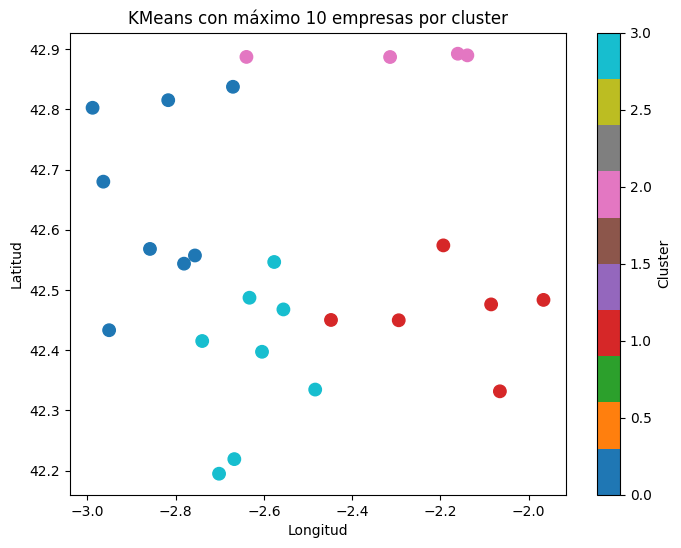

In [15]:
import pandas as pd
from k_means_constrained import KMeansConstrained
import matplotlib.pyplot as plt

# Datos de entrada
X = df[["lat", "lon"]]

# Clustering con restricción de tamaño (máx 10 por cluster)
kmeans = KMeansConstrained(
    n_clusters=4,
    size_min=2,
    size_max=8,
    random_state=42
)

df["cluster_label"] = kmeans.fit_predict(X)

# Mostrar resultados
print(df[["CLIENTE", "LOCALIDAD", "cluster_label"]])

# Visualización
plt.figure(figsize=(8, 6))
plt.scatter(df["lon"], df["lat"], c=df["cluster_label"], cmap="tab10", s=80)
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("KMeans con máximo 10 empresas por cluster")
plt.colorbar(label="Cluster")
plt.show()


In [16]:
df.sort_values(by='cluster_label')

,CLIENTE,LOCALIDAD,PROVINCIA,lat,lon,tiempo_desde_sede_min,cluster_label
0,1,HARO,LA RIOJA,42.568106,-2.858153,2.664373,0
1,3,STO. DOMINGO,LA RIOJA,42.433120,-2.950750,17.536715,0
4,6,VITORIA,ALAVA,42.837400,-2.670095,43.027608,0
7,10,SAN VICENTE,LA RIOJA,42.557231,-2.756225,11.553523,0
11,19,SALINAS,ALAVA,42.802543,-2.988256,35.326752,0
12,20,MIRANDA,BURGOS,42.679820,-2.963887,19.295470,0
10,18,NANCLARES,ALAVA,42.815165,-2.816816,35.582374,0
26,36,BRIONES,LA RIOJA,42.543636,-2.781000,9.147860,0
16,24,PRADEJÓN,LA RIOJA,42.331627,-2.065081,84.998472,1
32,45,LERÍN,NAVARRA,42.483451,-1.966285,89.890529,1


In [21]:
# Asegúrate de que ambas columnas estén en mayúsculas y sin espacios
df["LOCALIDAD"] = df["LOCALIDAD"].str.strip().str.upper()
df_original["LOCALIDAD"] = df_original["LOCALIDAD"].str.strip().str.upper()

# Quitamos duplicados del df_clusters por localidad, por si acaso
df_unique = df[["LOCALIDAD", "cluster_label"]].drop_duplicates()

# Hacemos el merge
df_original_con_cluster = df_original.merge(df_unique, on="LOCALIDAD", how="left")


In [24]:
df_original_con_cluster.sort_values(by='cluster_label')

,CLIENTE,LOCALIDAD,PROVINCIA,lat,lon,tiempo_desde_sede_min,cluster_label
0,1,HARO,LA RIOJA,42.568106,-2.858153,2.664373,0
1,3,STO. DOMINGO,LA RIOJA,42.433120,-2.950750,17.536715,0
3,5,HARO,LA RIOJA,42.569054,-2.858238,2.765751,0
4,6,VITORIA,ALAVA,42.837400,-2.670095,43.027608,0
7,10,SAN VICENTE,LA RIOJA,42.557231,-2.756225,11.553523,0
11,19,SALINAS,ALAVA,42.802543,-2.988256,35.326752,0
10,18,NANCLARES,ALAVA,42.815165,-2.816816,35.582374,0
9,17,HARO,LA RIOJA,42.574936,-2.859990,3.384404,0
12,20,MIRANDA,BURGOS,42.679820,-2.963887,19.295470,0
30,41,MIRANDA,BURGOS,42.693987,-2.943053,20.200367,0


In [ ]:
df_original_con_cluster=df_original_con_cluster.set_index("CLIENTE")

In [25]:
df_original_con_cluster["cluster_label"].value_counts()

cluster_label
0    14
3    11
1     8
2     4
Name: count, dtype: int64

In [26]:
df_original_con_cluster.to_csv("clientes_con_cluster.csv")